In [85]:
import os
import glob 


from scipy.io import loadmat
from datetime import datetime, timedelta

import pandas as pd
import numpy as np 


from matplotlib import rc 
import matplotlib
import matplotlib.pyplot as plt

# Uncomment to export 
# rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)

# import holoviews as hv
# hv.extension('bokeh')

# from sklearn import linear_model
# import statsmodels.api as sm
# from statsmodels.distributions.empirical_distribution import ECDF


In [86]:
N = 6
name_s = glob.glob(os.getcwd()+'/../Output/space**.csv')
name_v = glob.glob(os.getcwd()+'/../Output/speed**.csv')
name_u = glob.glob(os.getcwd()+'/../Output/control**.csv')
name_r = glob.glob(os.getcwd()+'/../Output/reference**.csv')
name_x = glob.glob(os.getcwd()+'/../Output/postition**.csv')

In [87]:
def read_df_list(files_dist):
    """Read a set of CSV files by variable"""
    truck_list = list(range(N))
    NROW = 550
    df_list = []
    df_info = []
    for name in files_dist:
        s_split = name.split('_')
        truck_id = int(s_split[2])
        s_gap = s_split[-1].split('.csv')
        gap_r = np.round(float(s_gap[0]),2)
        df_info.append((truck_id, gap_r))
        df_list.append(pd.read_csv(name, delimiter='\t', names = truck_list, nrows = NROW))
    
    full_data = pd.concat(df_list, keys = df_info)
    df = full_data.reset_index()
    
    df.columns = ['Yield','Gap','t']+list(df.columns)[3:]
    df['t'] = df['t'].apply(lambda x: x*0.1)
    df = df.set_index(['Yield','Gap','t'])
    return df 

In [88]:
df_s = read_df_list(name_s)
df_v = read_df_list(name_v)
df_u = read_df_list(name_u)
df_r = read_df_list(name_r)
df_x = read_df_list(name_x)

In [89]:
df_s

0        1        2        3        4        5
Yield Gap t                                                      
2     1.8 0.0   18.0  30.0000  30.0000  30.0000  30.0000  30.0000
          0.1   18.0  30.0000  30.0000  30.0000  30.0000  30.0000
          0.2   18.0  30.0000  30.0000  30.0000  30.0000  30.0000
          0.3   18.0  30.0000  30.0001  30.0000  30.0000  30.0000
          0.4   18.0  30.0000  30.0001  29.9999  30.0000  30.0000
          0.5   18.0  30.0000  30.0002  29.9999  29.9999  30.0000
          0.6   18.0  30.0000  30.0003  29.9999  29.9999  30.0000
          0.7   18.0  30.0000  30.0004  29.9998  29.9999  29.9999
          0.8   18.0  30.0000  30.0005  29.9998  29.9999  29.9999
          0.9   18.0  30.0000  30.0006  29.9997  29.9998  29.9999
          1.0   18.0  30.0000  30.0008  29.9996  29.9998  29.9999
          1.1   18.0  30.0000  30.0010  29.9996  29.9997  29.9998
          1.2   18.0  30.0000  30.0012  29.9995  29.9997  29.9998
          1.3   18.0  30.0000  30.0014  29.9994  29.9996  29.9998
          1.4   18.0  30.0000  30.0016  29.9993  29.9996  29.9997
          1.5   18.0  30.0000  30.0019  29.9992  29.9995  29.9997
          1.6   18.0  30.0000  30.0021  29.9992  29.9994  29.9996
          1.7   18.0  30.0000  30.0024  29.9991  29.9994  29.9996
          1.8   18.0  30.0000  30.0027  29.9990  29.9993  29.9995
          1.9   18.0  30.0000  30.0030  29.9989  29.9992  29.9995
          2.0   18.0  30.0000  30.0033  29.9988  29.9991  29.9994
          2.1   18.0  30.0000  30.0037  29.9987  29.9991  29.9993
          2.2   18.0  30.0000  30.0041  29.9986  29.9990  29.9993
          2.3   18.0  30.0000  30.0044  29.9985  29.9989  29.9992
          2.4   18.0  30.0000  30.0049  29.9983  29.9988  29.9991
          2.5   18.0  30.0000  30.0053  29.9982  29.9987  29.9990
          2.6   18.0  30.0000  30.0057  29.9981  29.9987  29.9990
          2.7   18.0  30.0000  30.0062  29.9980  29.9986  29.9989
          2.8   18.0  30.0000  30.0067  29.9979  29.9985  29.9988
          2.9   18.0  30.0000  30.0072  29.9978  29.9984  29.9987
...              ...      ...      ...      ...      ...      ...
1     1.2 52.0  18.0  42.0003  30.0009  30.0018  30.0030  30.0046
          52.1  18.0  42.0003  30.0009  30.0018  30.0030  30.0046
          52.2  18.0  42.0003  30.0009  30.0018  30.0030  30.0047
          52.3  18.0  42.0003  30.0009  30.0018  30.0030  30.0047
          52.4  18.0  42.0003  30.0009  30.0018  30.0030  30.0047
          52.5  18.0  42.0003  30.0009  30.0018  30.0031  30.0048
          52.6  18.0  42.0003  30.0009  30.0018  30.0031  30.0048
          52.7  18.0  42.0003  30.0009  30.0018  30.0031  30.0048
          52.8  18.0  42.0003  30.0009  30.0018  30.0031  30.0049
          52.9  18.0  42.0003  30.0009  30.0018  30.0031  30.0049
          53.0  18.0  42.0003  30.0009  30.0018  30.0031  30.0049
          53.1  18.0  42.0003  30.0009  30.0018  30.0031  30.0049
          53.2  18.0  42.0003  30.0009  30.0018  30.0031  30.0050
          53.3  18.0  42.0003  30.0009  30.0018  30.0031  30.0050
          53.4  18.0  42.0003  30.0009  30.0018  30.0031  30.0050
          53.5  18.0  42.0003  30.0009  30.0018  30.0031  30.0050
          53.6  18.0  42.0003  30.0009  30.0018  30.0031  30.0051
          53.7  18.0  42.0003  30.0009  30.0018  30.0031  30.0051
          53.8  18.0  42.0003  30.0009  30.0018  30.0031  30.0051
          53.9  18.0  42.0003  30.0009  30.0018  30.0031  30.0051
          54.0  18.0  42.0003  30.0009  30.0018  30.0031  30.0052
          54.1  18.0  42.0003  30.0009  30.0018  30.0031  30.0052
          54.2  18.0  42.0003  30.0009  30.0018  30.0032  30.0052
          54.3  18.0  42.0003  30.0009  30.0018  30.0032  30.0052
          54.4  18.0  42.0003  30.0009  30.0018  30.0032  30.0052
          54.5  18.0  42.0003  30.0009  30.0018  30.0032  30.0053
          54.6  18.0  42.0003  30.0009  30.0018  30.0032  30.0053
          54.7  18.0  42.0003  30.0009  30.0017  30.0032  3

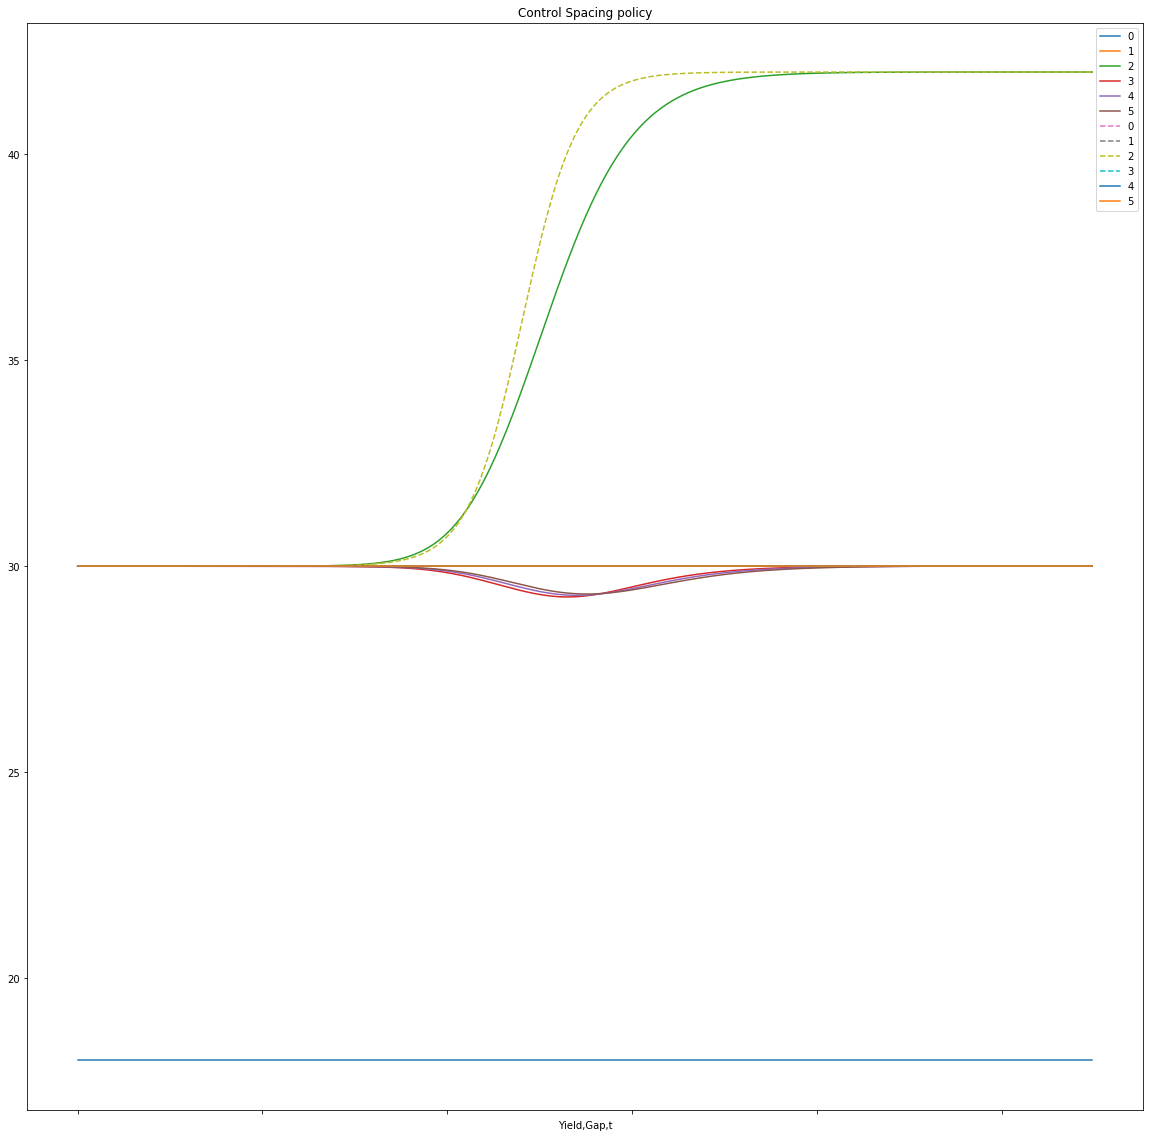

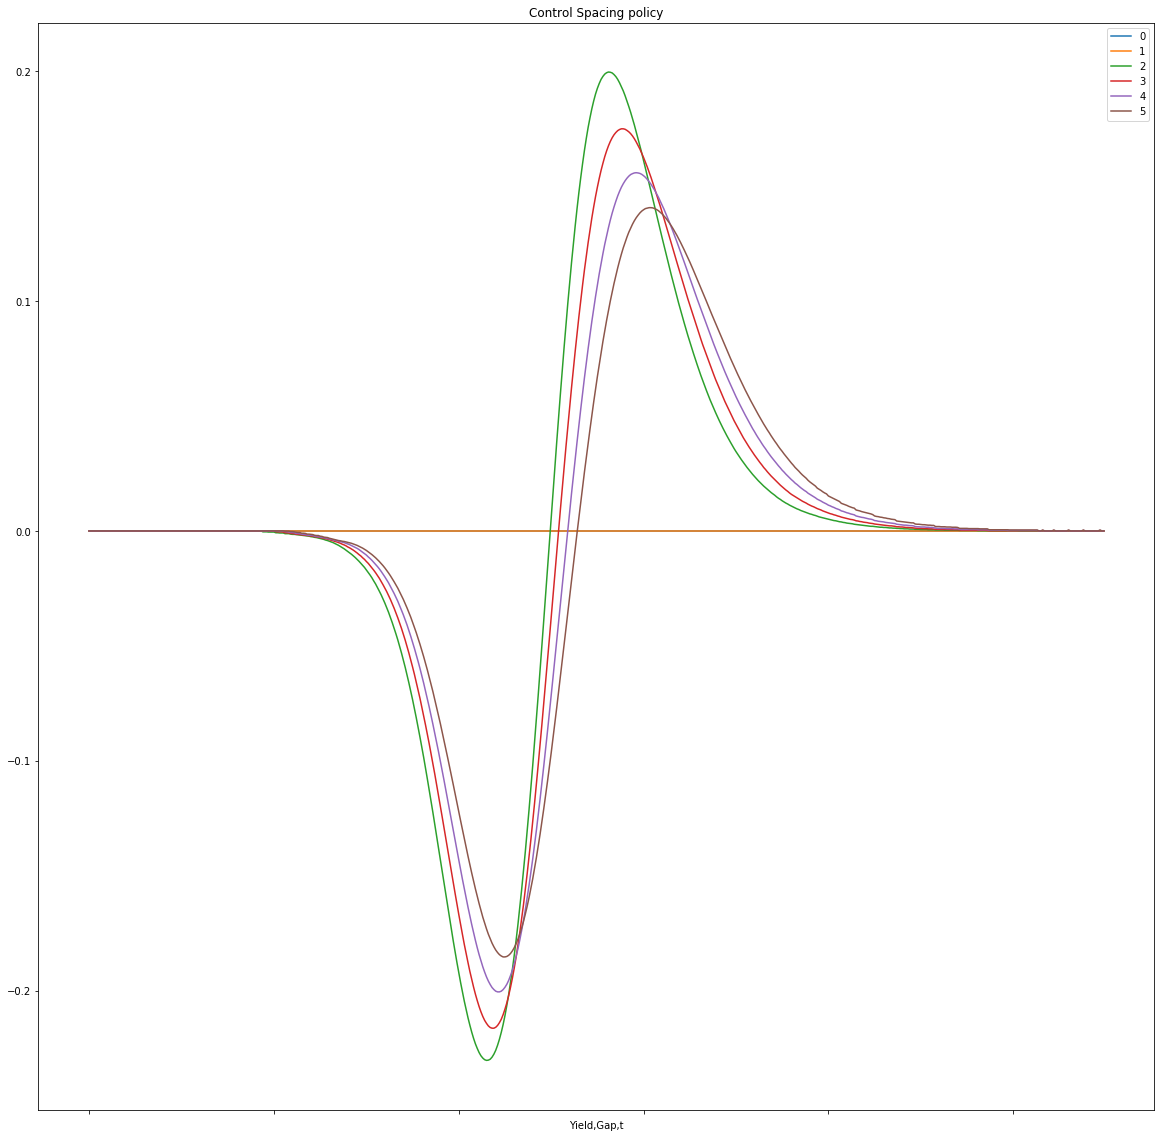

In [92]:
# df_s.index
gap_v = [1.2,
         1.7999999999999998, 
         2.4]

df_s.loc[(2,gap_v[0],slice(None)),:].plot(figsize = (20,20));
ax = plt.gca()
df_r.loc[(2,gap_v[0],slice(None)),:].plot(ax=ax, style = ['--']*4);
plt.title('Control Spacing policy')

plt.savefig('../Output/spacing-test.pdf',format='pdf', bbox_inches='tight')

df2p = df_u.loc[(2,gap_v[0],slice(None)),:]
df2p.plot(figsize = (20,20));
plt.title('Control Spacing policy')

plt.savefig('../Output/control-spacing-test.pdf',format='pdf', bbox_inches='tight')

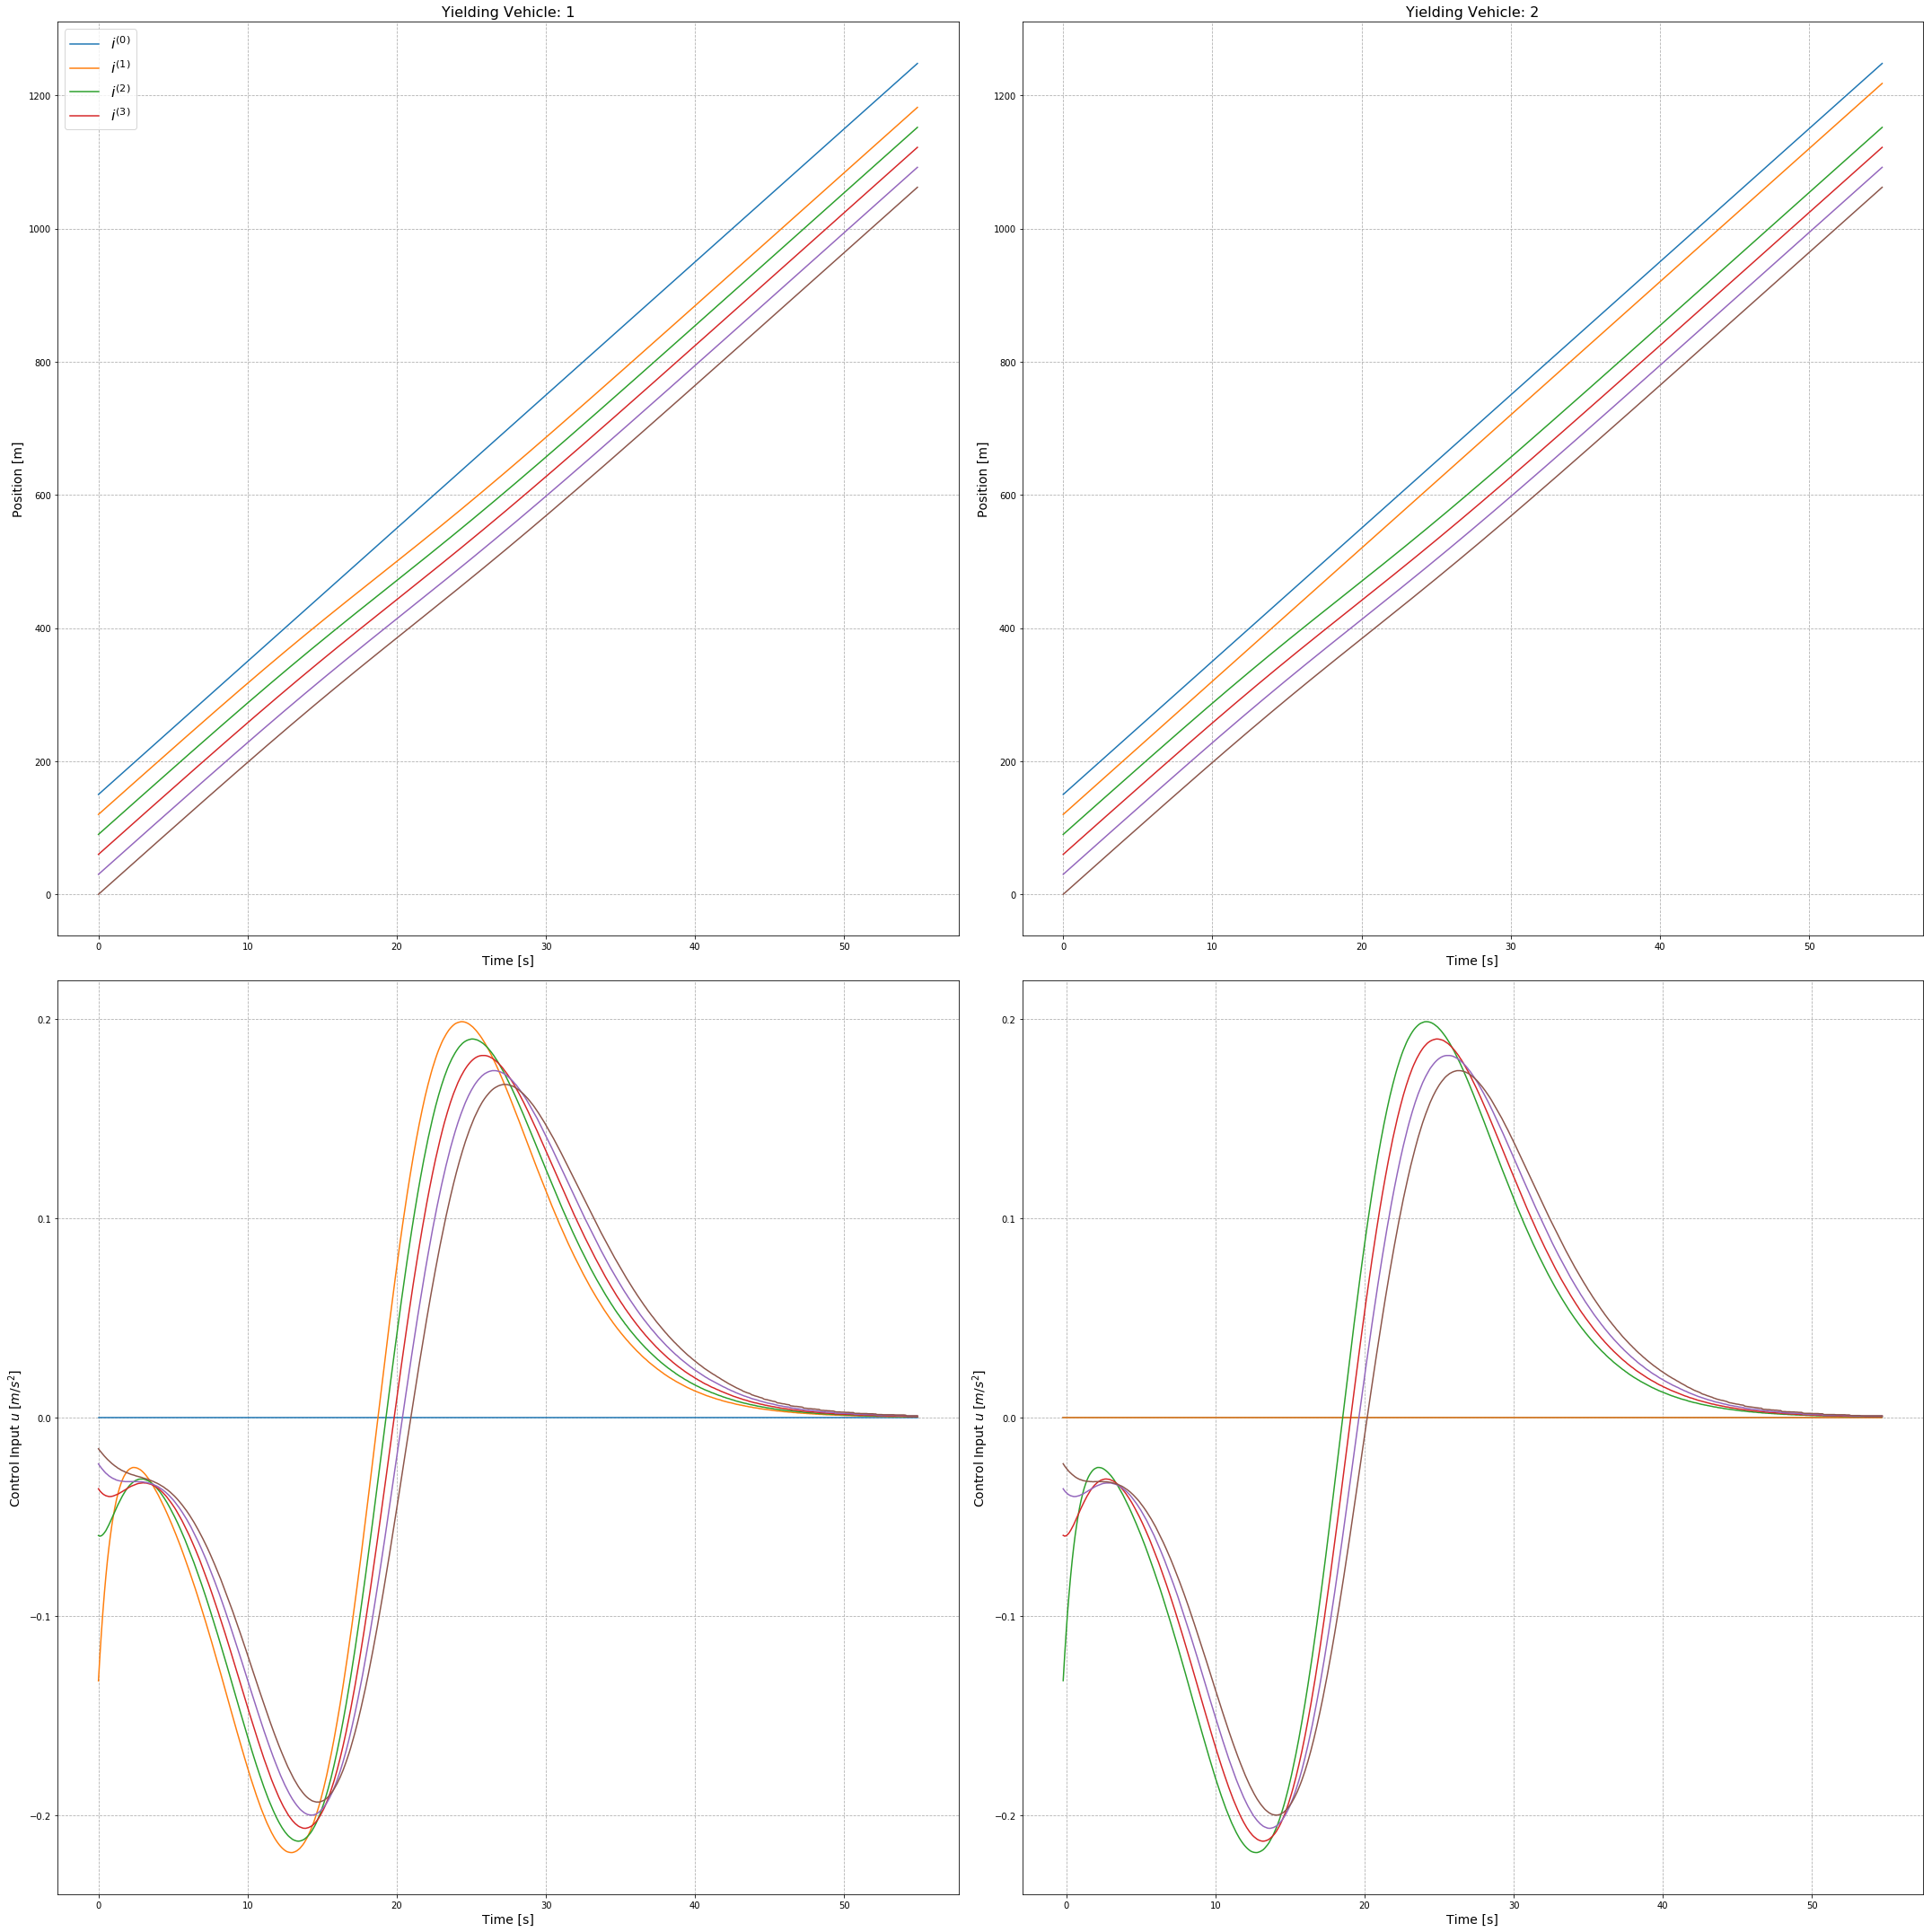

In [93]:
selector1 = (1, 2.4, slice(None))
selector2 = (2, 2.4, slice(None))
selector3 = (3, 2.4, slice(None))

df_case1 = df_x.loc[selector1,:].reset_index()
df_case2 = df_x.loc[selector2,:].reset_index()
df_case3 = df_x.loc[selector3,:].reset_index()

df_case1u = df_u.loc[selector1,:].reset_index()
df_case2u = df_u.loc[selector2,:].reset_index()
df_case3u = df_u.loc[selector3,:].reset_index()




fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(30,30))

ax[0][0].plot(df_case1['t'], df_case1[[0,1,2,3,4,5]])
ax[0][0].set_xlabel('Time [s]',fontsize = 14);
ax[0][0].set_ylabel('Position [m]',fontsize = 14);
ax[0][0].set_title('Yielding Vehicle: 1',fontsize = 16);
ax[0][0].legend( [r'$i^{(0)}$',r'$i^{(1)}$',r'$i^{(2)}$',r'$i^{(3)}$'], fontsize = 16)
ax[0][0].grid(True, linestyle='--')
ax[0][1].plot(df_case2['t'], df_case2[[0,1,2,3,4,5]])
ax[0][1].set_xlabel('Time [s]',fontsize = 14);
ax[0][1].set_ylabel('Position [m]',fontsize = 14);
ax[0][1].set_title('Yielding Vehicle: 2',fontsize = 16);
ax[0][1].grid(True, linestyle='--')
# ax[0][2].plot(df_case3['t'], df_case3[[0,1,2,3]])
# ax[0][2].set_xlabel('Time [s]',fontsize = 14);
# ax[0][2].set_ylabel('Position [m]',fontsize = 14);
# ax[0][2].set_title('Yielding Vehicle: 3',fontsize = 16);
# ax[0][2].grid(True, linestyle='--')

ax[1][0].plot(df_case1u['t'], df_case1u[[0,1,2,3,4,5]])
ax[1][0].set_xlabel('Time [s]',fontsize = 14);
ax[1][0].set_ylabel(f'Control Input $u$ [$m/s^2$]',fontsize = 14);
ax[1][0].grid(True, linestyle='--')
ax[1][1].plot(df_case2u['t']-0.2, df_case2u[[0,1,2,3,4,5]])
ax[1][1].set_xlabel('Time [s]',fontsize = 14);
ax[1][1].set_ylabel(f'Control Input $u$ [$m/s^2$]',fontsize = 14);
ax[1][1].grid(True, linestyle='--')
# ax[1][2].plot(df_case3u['t'], df_case3u[[0,1,2,3]])
# ax[1][2].set_xlabel('Time [s]',fontsize = 14);
# ax[1][2].set_ylabel(f'Control Input $u$ [$m/s^2$]',fontsize = 14);
# ax[1][2].grid(True, linestyle='--')

# fig.suptitle('Splitting Scenarios',fontsize = 20, y = 1.02)
fig.tight_layout()

plt.savefig('../Output/split-scenarios.pdf',format='pdf', bbox_inches='tight')